<a href="https://colab.research.google.com/github/khdanzi/oibsip_taskno/blob/main/task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OASIS INFOBYTE INTERNSHIP** : DATA ANALYTICS

## Task 5: Predicting House Prices with Linear Regression

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


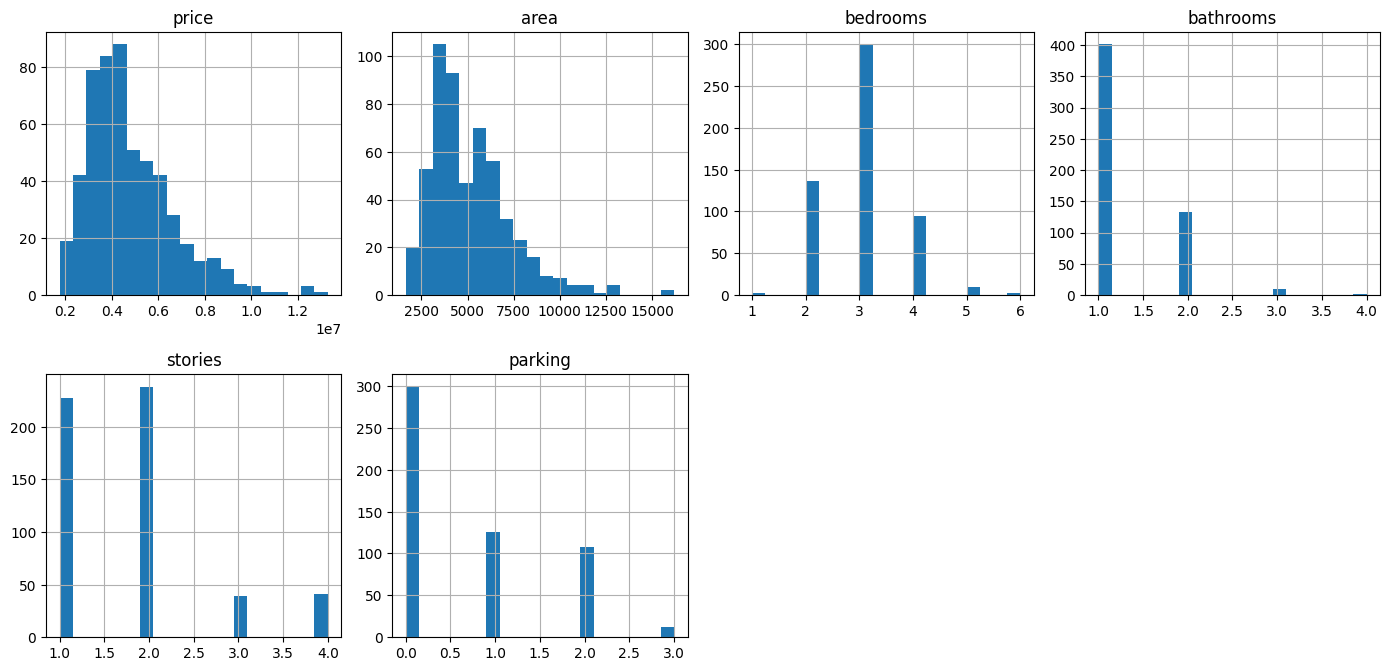

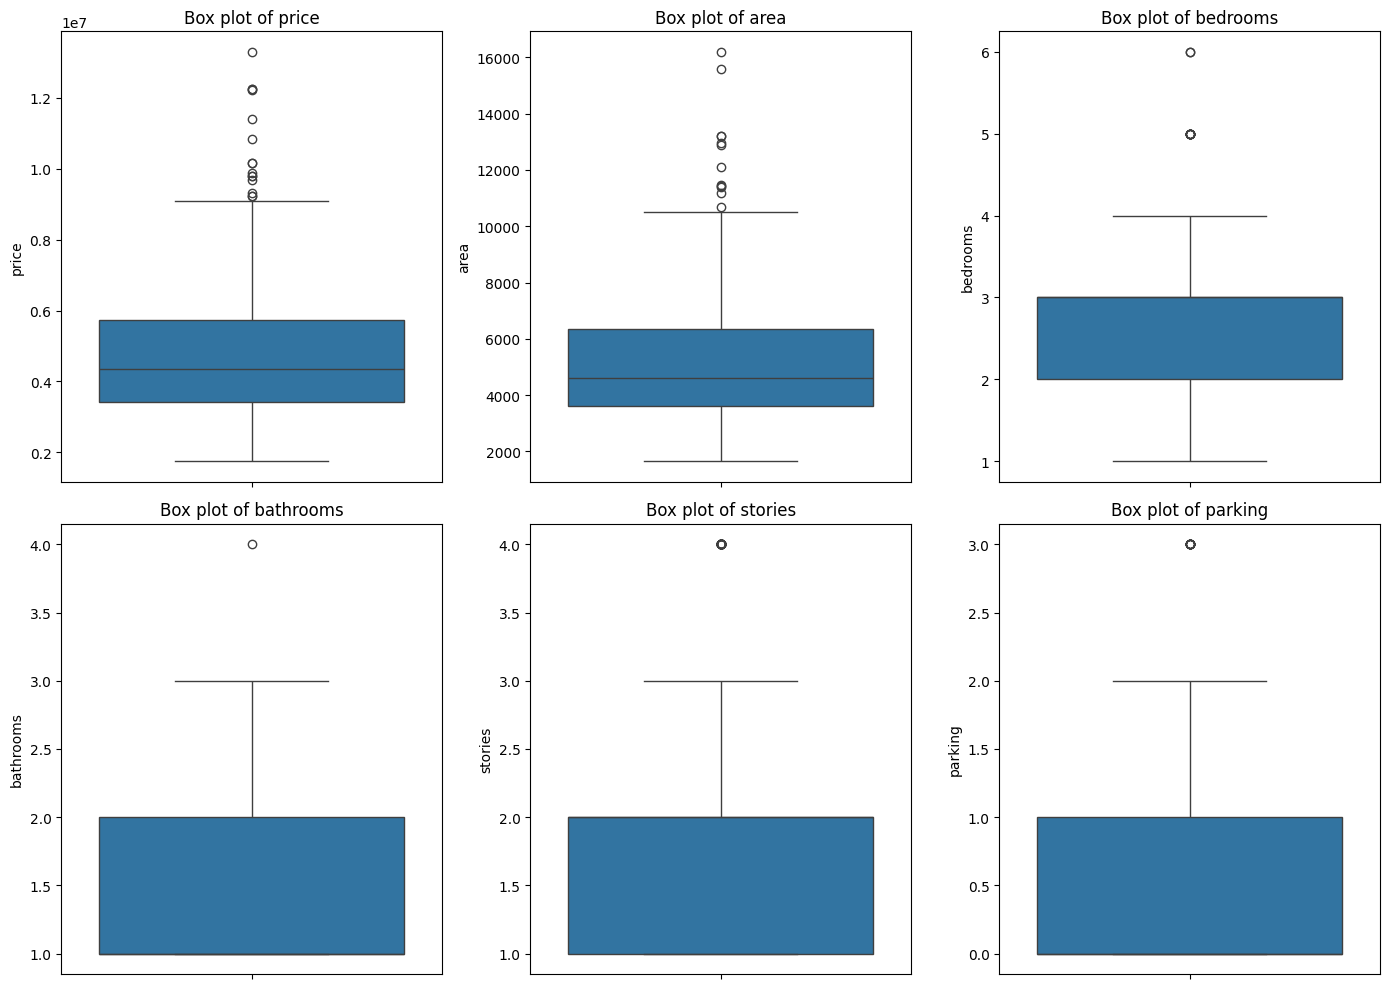

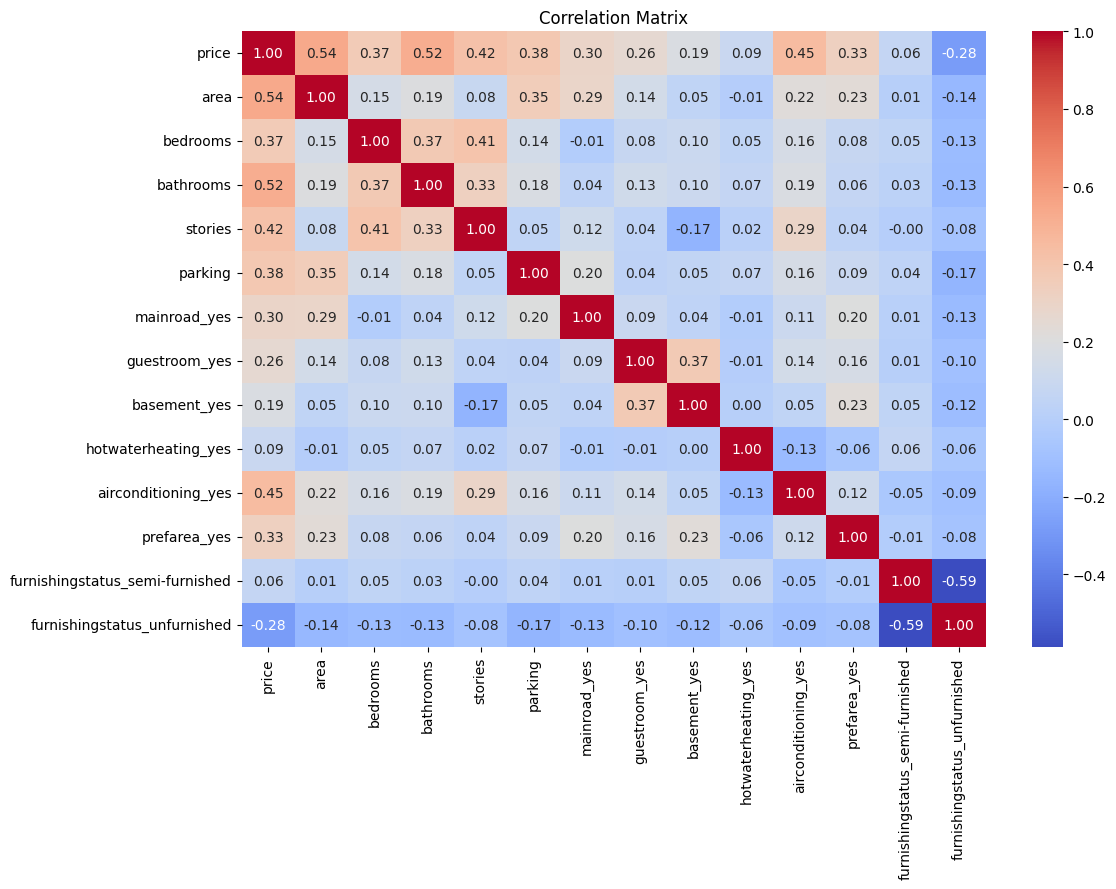

R-squared: 0.6529242642153184


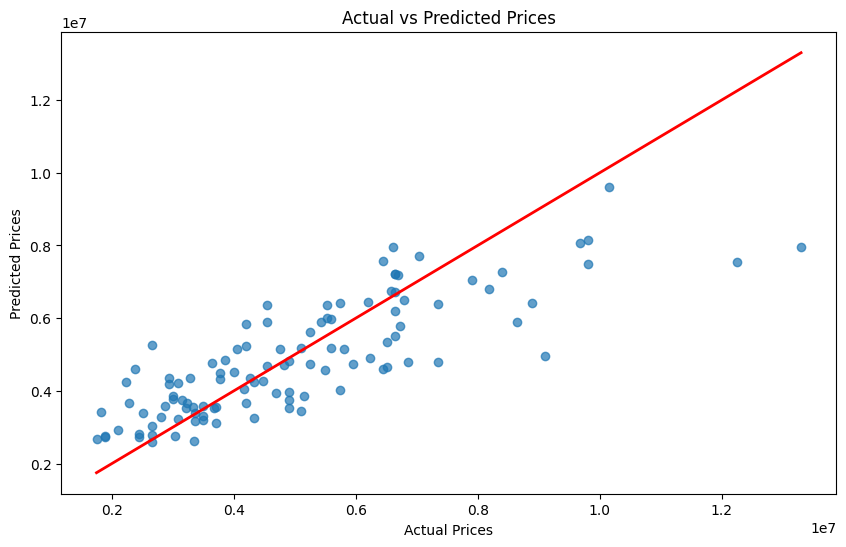

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Colab Notebooks/housing/Housing.csv'
housing_data = pd.read_csv(file_path)

# Encode categorical variables
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
housing_data_encoded = pd.get_dummies(housing_data, columns=categorical_cols, drop_first=True)

# Data Visualization
# Create histograms for numerical features
housing_data_encoded.hist(bins=20, figsize=(14, 10), layout=(3, 4))  # Adjusted layout to fit all histograms
plt.tight_layout()
plt.show()

# Create box plots for numerical features
numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
fig, axes = plt.subplots(2, 3, figsize=(14, 10))  # Adjusted layout to fit all box plots
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=housing_data_encoded[col], ax=axes[i])
    axes[i].set_title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

# Create a correlation matrix
correlation_matrix = housing_data_encoded.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Feature Selection
# Based on the correlation matrix, identify the most relevant features
# For this example, we'll use all features for simplicity

# Define features (X) and target (y)
X = housing_data_encoded.drop('price', axis=1)
y = housing_data_encoded['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)


print(f'R-squared: {r2}')

# Visualization of Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.show()